In [51]:
!pip install pandas matplotlib seaborn scikit-learn

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import skew, kurtosis
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA
import os

## Load Dataset

In [53]:
url_data = pd.read_csv('url_data.csv')

# Data Preparation

In [54]:
# Display basic information
url_data.info()

# Display summary statistics
url_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319505 entries, 0 to 319504
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            319505 non-null  int64  
 1   month           319505 non-null  int64  
 2   page_path       319495 non-null  object 
 3   sessions        319505 non-null  int64  
 4   page_views      319505 non-null  int64  
 5   number_bounces  319505 non-null  int64  
 6   engagment_time  154126 non-null  float64
 7   active_users    154126 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


,year,month,page_path,sessions,page_views,number_bounces,engagment_time,active_users
count,319505.000000,319505.000000,319495,3.195050e+05,319505.000000,3.195050e+05,1.541260e+05,1.541260e+05
unique,NaN,NaN,148577,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,/mata-atlantica/,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN
mean,2023.252074,5.248816,NaN,1.672935e+03,1576.213546,7.921797e+02,1.312644e+05,2.137939e+03
std,0.434204,3.221711,NaN,1.055422e+05,7361.880043,3.445524e+04,1.933417e+07,1.150406e+05
min,2023.000000,1.000000,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2023.000000,3.000000,NaN,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000e+00
50%,2023.000000,4.000000,NaN,1.000000e+00,2.000000,1.000000e+00,0.000000e+00,2.000000e+00
75%,2024.000000,8.000000,NaN,1.530000e+02,212.000000,5.900000e+01,6.600000e+01,6.930000e+02


In [55]:
# Create a new 'date' column combining 'year' and 'month'
url_data['date'] = pd.to_datetime(url_data['year'].astype(str) + '-' + url_data['month'].astype(str) + '-01')

# Drop the original 'year' and 'month' columns if they are no longer needed
url_data.drop(['year', 'month'], axis=1, inplace=True)


In [56]:
# Assuming your DataFrame is named url_data
url_data.describe(include='all', datetime_is_numeric=True)

,page_path,sessions,page_views,number_bounces,engagment_time,active_users,date
count,319495,3.195050e+05,319505.000000,3.195050e+05,1.541260e+05,1.541260e+05,319505
unique,148577,NaN,NaN,NaN,NaN,NaN,NaN
top,/mata-atlantica/,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.672935e+03,1576.213546,7.921797e+02,1.312644e+05,2.137939e+03,2023-08-09 12:40:25.516971520
min,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2023-01-01 00:00:00
25%,NaN,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,2023-04-01 00:00:00
50%,NaN,1.000000e+00,2.000000,1.000000e+00,0.000000e+00,2.000000e+00,2023-08-01 00:00:00
75%,NaN,1.530000e+02,212.000000,5.900000e+01,6.600000e+01,6.930000e+02,2024-01-01 00:00:00
max,NaN,2.910618e+07,543042.000000,9.890021e+06,3.658023e+09,2.219464e+07,2024-04-01 00:00:00


In [57]:
# Display the first few rows of the dataset
url_data.head()

,page_path,sessions,page_views,number_bounces,engagment_time,active_users,date
0,/simone-de-beauvoiuolr/,0,1,0,NaN,NaN,2023-04-01
1,/numeros-romanos/mcdxxv/,1,2,1,NaN,NaN,2023-04-01
2,/numeros-romanos/mcmlv/,18,25,12,NaN,NaN,2023-04-01
3,/imperio-romano /,1,1,0,NaN,NaN,2023-04-01
4,/numeros-romanos/1948/,16,20,14,NaN,NaN,2023-04-01


In [58]:
# Display basic information
url_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319505 entries, 0 to 319504
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   page_path       319495 non-null  object        
 1   sessions        319505 non-null  int64         
 2   page_views      319505 non-null  int64         
 3   number_bounces  319505 non-null  int64         
 4   engagment_time  154126 non-null  float64       
 5   active_users    154126 non-null  float64       
 6   date            319505 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 17.1+ MB


In [59]:

total_rows = url_data.shape[0]  # Index 0 to get the number of rows
print("Total number of rows:", total_rows)


Total number of rows: 319505


## Count Zero Values

In [61]:
zero_counts = {
    "page_views": (url_data['page_views'] == 0).sum(),
    "active_users": (url_data['active_users'] == 0).sum(),
    "sessions": (url_data['sessions'] == 0).sum()
}


In [62]:
print(zero_counts)


{'page_views': 161, 'active_users': 5, 'sessions': 37055}


## Count Missing Values

In [64]:
missing_counts = {
    "page_path": url_data['page_path'].isnull().sum()
}


In [65]:
print (missing_counts)

{'page_path': 10}


## Remove Zero Values

In [67]:
data_cleaned = url_data[(url_data['page_views'] != 0) & (url_data['sessions'] != 0)]
if 'active_users' in url_data.columns:  # Check if active_users exists in the dataset
    data_cleaned = data_cleaned[data_cleaned['active_users'].fillna(1) != 0]  # Replace NaNs temporarily with 1 for filtering



## Remove Missing Values

In [68]:
data_cleaned = data_cleaned.dropna(subset=['page_path'])


In [72]:
post_cleanup_counts = {
    "Zero Values": {
        "page_views": (data_cleaned['page_views'] == 0).sum(),
        "active_users": (data_cleaned['active_users'] == 0).sum(),
        "sessions": (data_cleaned['sessions'] == 0).sum()
    },
    "Missing Values": {
        "page_path": data_cleaned['page_path'].isnull().sum()
    }
}

In [73]:
print (post_cleanup_counts) 

{'Zero Values': {'page_views': 0, 'active_users': 0, 'sessions': 0}, 'Missing Values': {'page_path': 0}}


In [79]:
# Specify the path where you want to save the file
cleaned_file_path = 'C:/Users/User/Desktop/7graus/cleaned_data.csv'  # Adjust the path if needed

# Check if the directory exists, and create it if it does not
directory = os.path.dirname(cleaned_file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a CSV file without the index
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Data saved successfully to {cleaned_file_path}")

Data saved successfully to C:/Users/User/Desktop/7graus/cleaned_data.csv


## Import Cleaned Data

In [81]:
data = pd.read_csv('cleaned_data.csv')

In [82]:
# Count the number of missing (NaN) values in each column
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
page_path              0
sessions               0
page_views             0
number_bounces         0
engagment_time    128234
active_users      128234
date                   0
dtype: int64


In [83]:
# Count the number of zero values in each column
zero_values = (data == 0).sum()
print("\nZero Values in Each Column:")
print(zero_values)



Zero Values in Each Column:
page_path              0
sessions               0
page_views             0
number_bounces     78353
engagment_time    105128
active_users           0
date                   0
dtype: int64


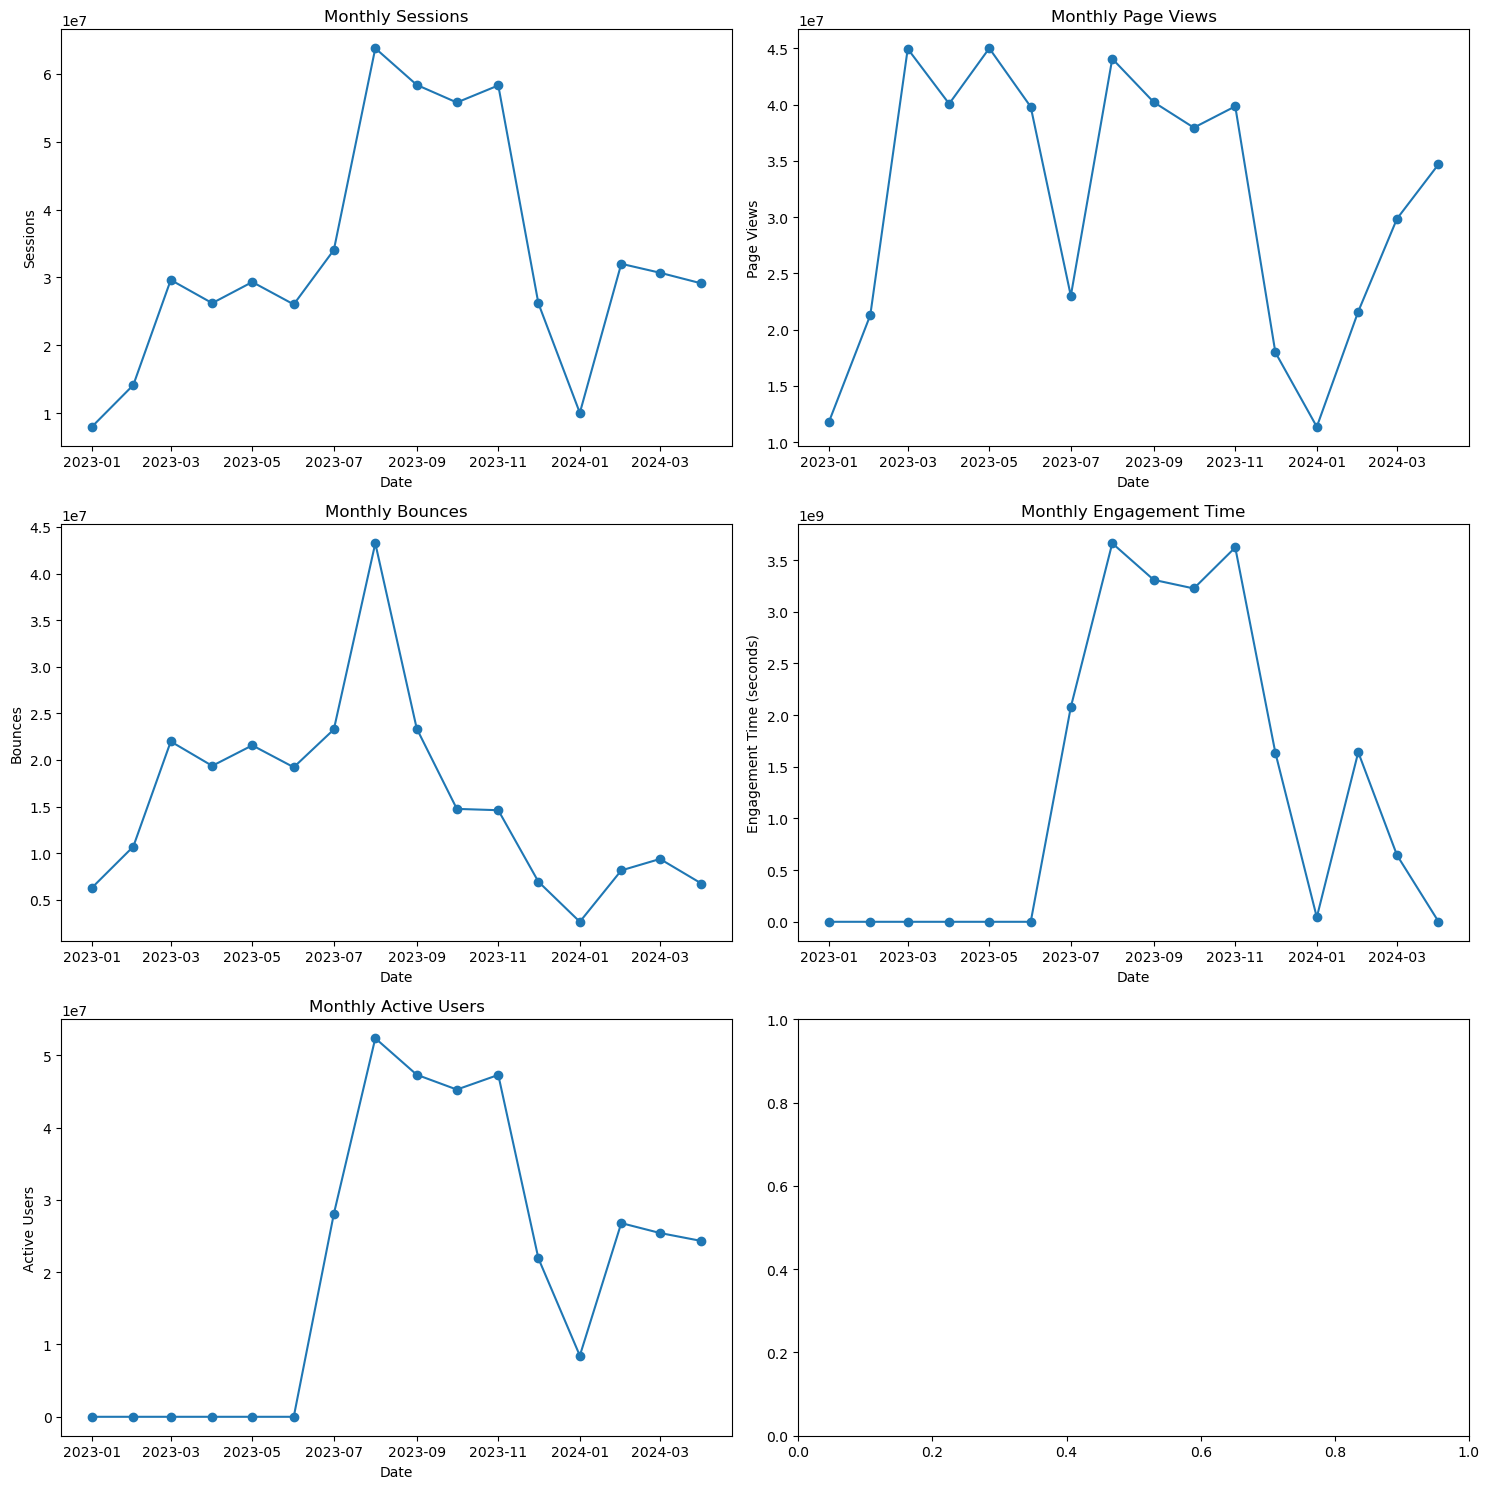

In [89]:

# Convert the 'date' column to datetime format for easier plotting
data['date'] = pd.to_datetime(data['date'])

# Aggregate the data by month, specifying numeric_only=True
monthly_data = data.groupby(data['date'].dt.to_period('M')).sum(numeric_only=True)

# Reset the index to have the dates as a column again
monthly_data = monthly_data.reset_index()

# Convert the 'date' column back to datetime format
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

# Plotting the trends over time
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Sessions over time
axs[0, 0].plot(monthly_data['date'], monthly_data['sessions'], marker='o')
axs[0, 0].set_title('Monthly Sessions')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Sessions')

# Page Views over time
axs[0, 1].plot(monthly_data['date'], monthly_data['page_views'], marker='o')
axs[0, 1].set_title('Monthly Page Views')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Page Views')

# Number of Bounces over time
axs[1, 0].plot(monthly_data['date'], monthly_data['number_bounces'], marker='o')
axs[1, 0].set_title('Monthly Bounces')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Bounces')

# Engagement Time over time
axs[1, 1].plot(monthly_data['date'], monthly_data['engagment_time'], marker='o')
axs[1, 1].set_title('Monthly Engagement Time')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Engagement Time (seconds)')

# Active Users over time
axs[2, 0].plot(monthly_data['date'], monthly_data['active_users'], marker='o')
axs[2, 0].set_title('Monthly Active Users')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Active Users')

# Adjust layout
plt.tight_layout()
plt.show()

##  Analyze trends for specific paths

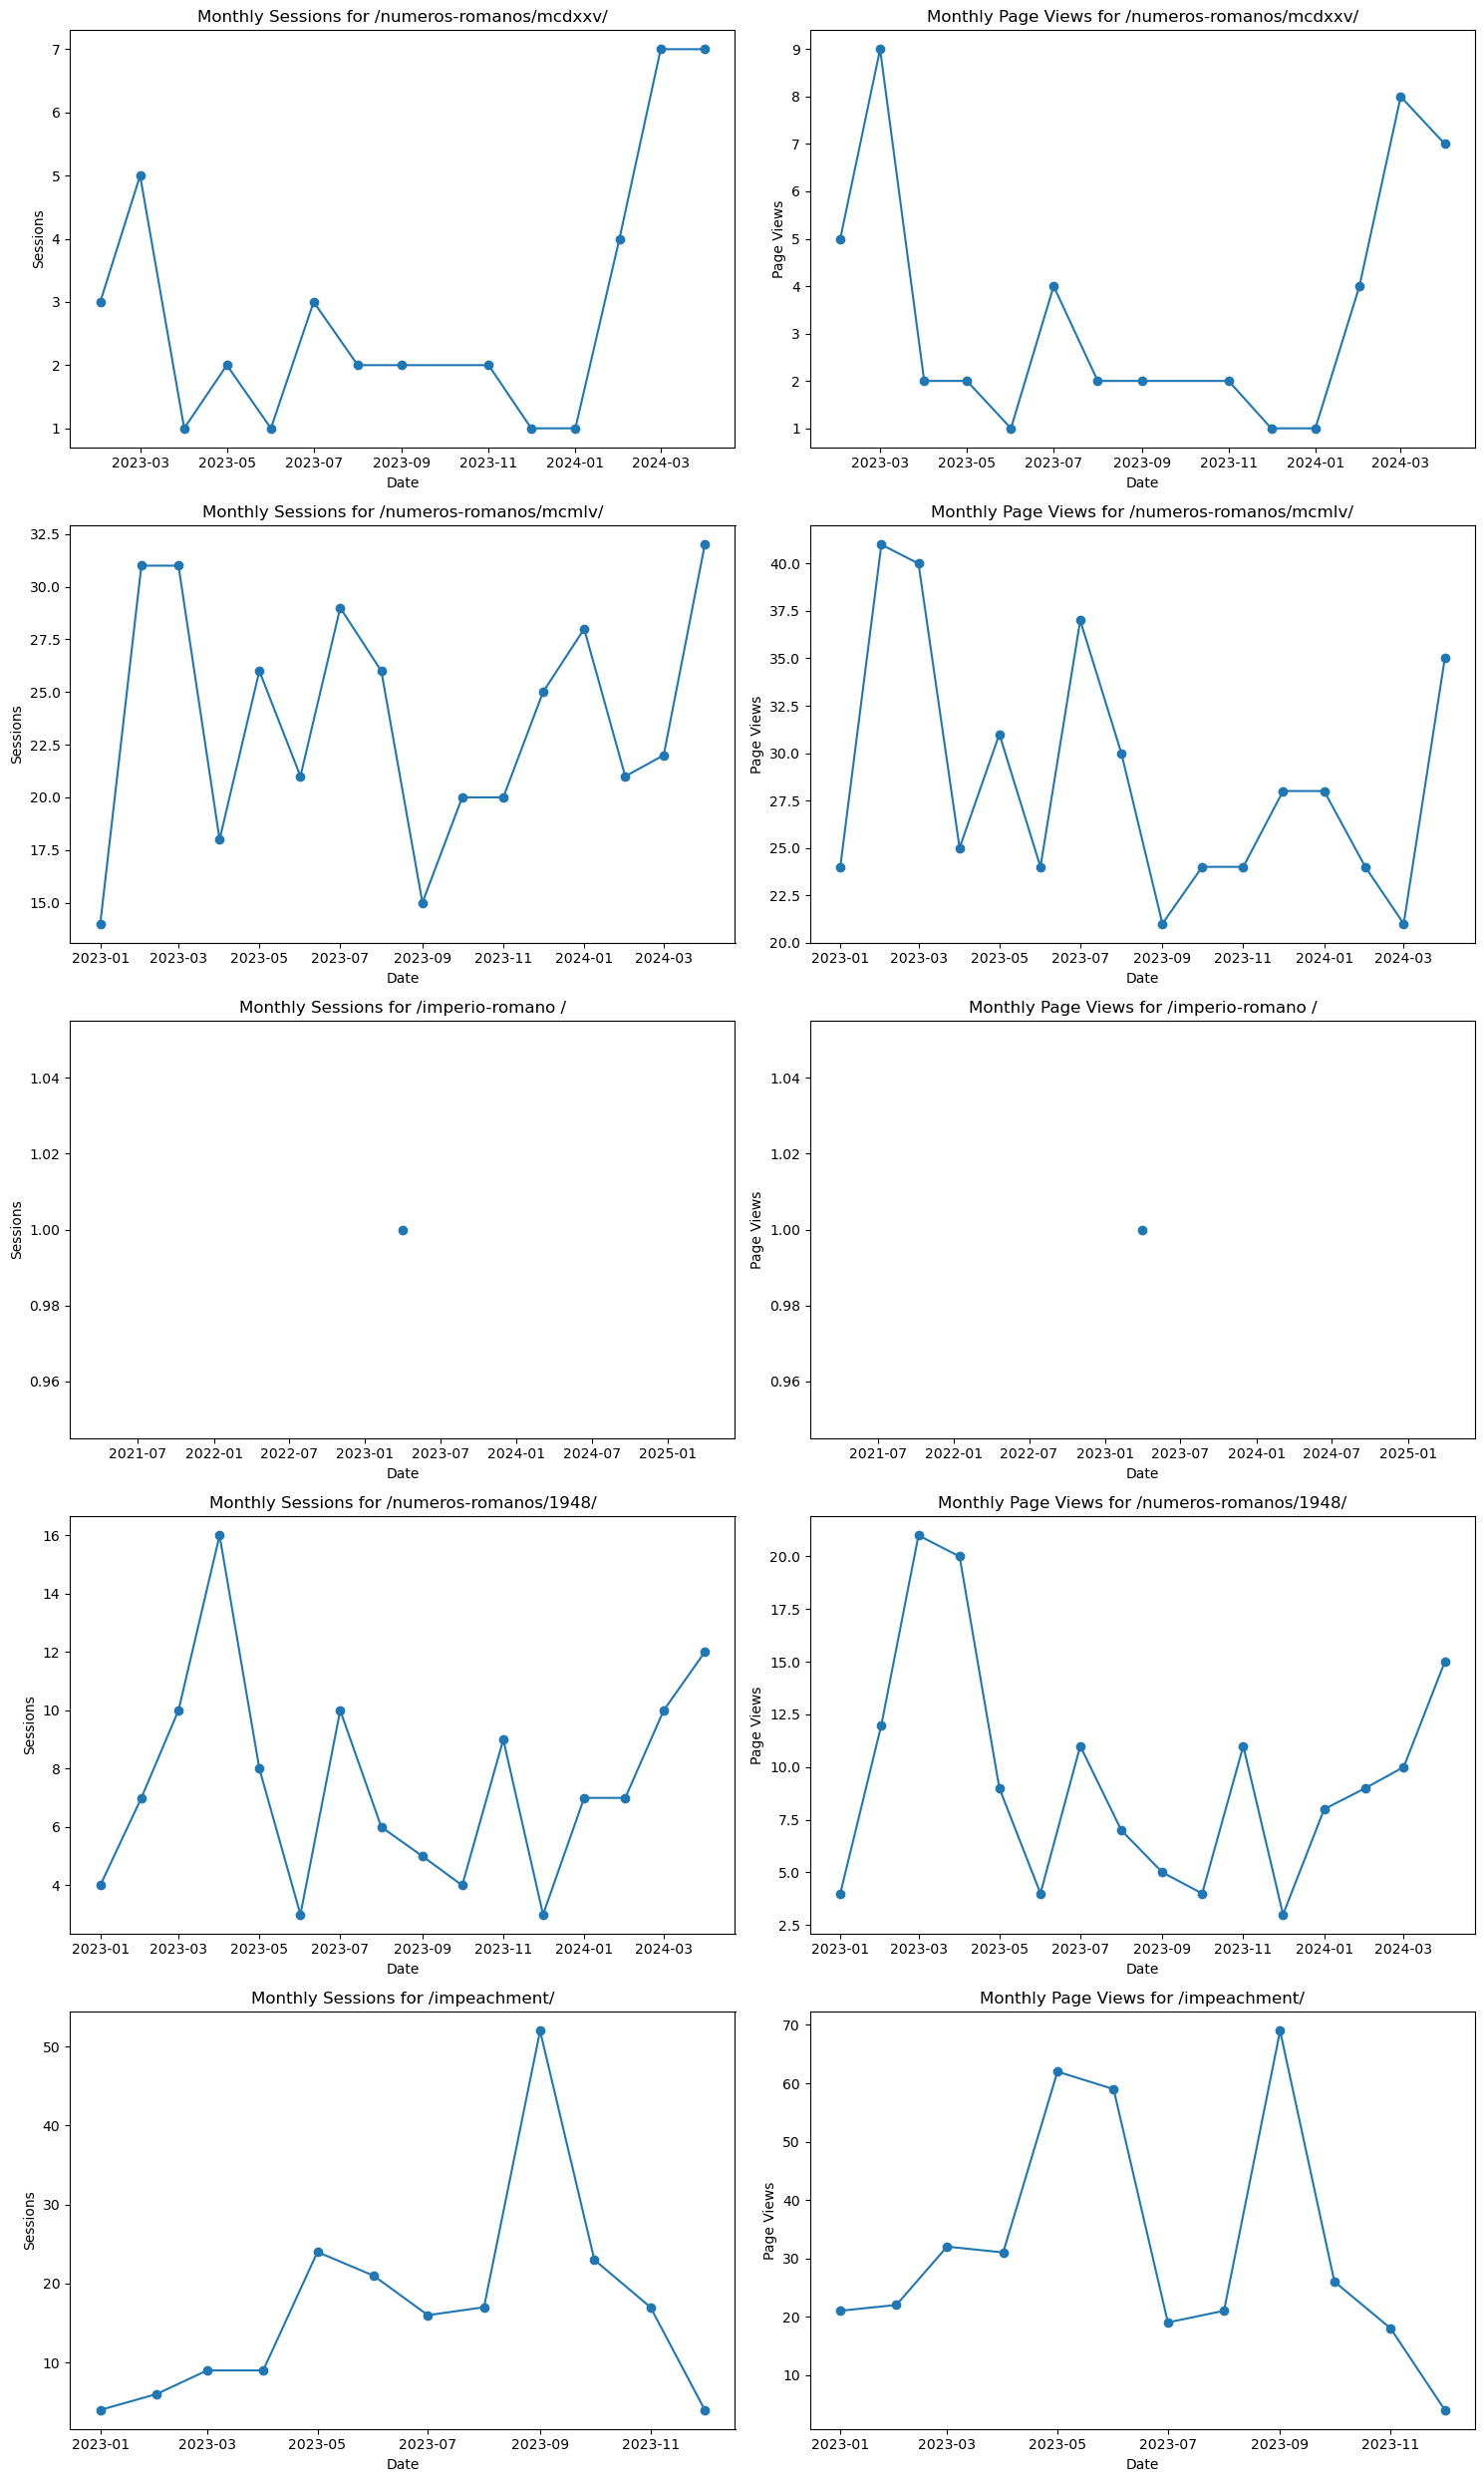

In [91]:
#Convert the 'date' column to datetime format for easier plotting
data['date'] = pd.to_datetime(data['date'])

# List of specific page paths to analyze
specific_page_paths = [
    '/numeros-romanos/mcdxxv/',
    '/numeros-romanos/mcmlv/',
    '/imperio-romano /',
    '/numeros-romanos/1948/',
    '/impeachment/'
]

# Filter data for the specific page paths
filtered_data = data[data['page_path'].isin(specific_page_paths)]

# Aggregate the data by month and page path
monthly_data = filtered_data.groupby([filtered_data['date'].dt.to_period('M'), 'page_path']).sum(numeric_only=True)

# Reset the index to have the dates and page paths as columns again
monthly_data = monthly_data.reset_index()

# Convert the 'date' column back to datetime format
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

# Plotting the trends over time for each specific page path
fig, axs = plt.subplots(len(specific_page_paths), 2, figsize=(15, 5 * len(specific_page_paths)))

for i, path in enumerate(specific_page_paths):
    page_data = monthly_data[monthly_data['page_path'] == path]
    
    # Sessions over time
    axs[i, 0].plot(page_data['date'], page_data['sessions'], marker='o')
    axs[i, 0].set_title(f'Monthly Sessions for {path}')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Sessions')
    
    # Page Views over time
    axs[i, 1].plot(page_data['date'], page_data['page_views'], marker='o')
    axs[i, 1].set_title(f'Monthly Page Views for {path}')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Page Views')

# Adjust layout
plt.tight_layout()
plt.show()

## Trends for most popular paths

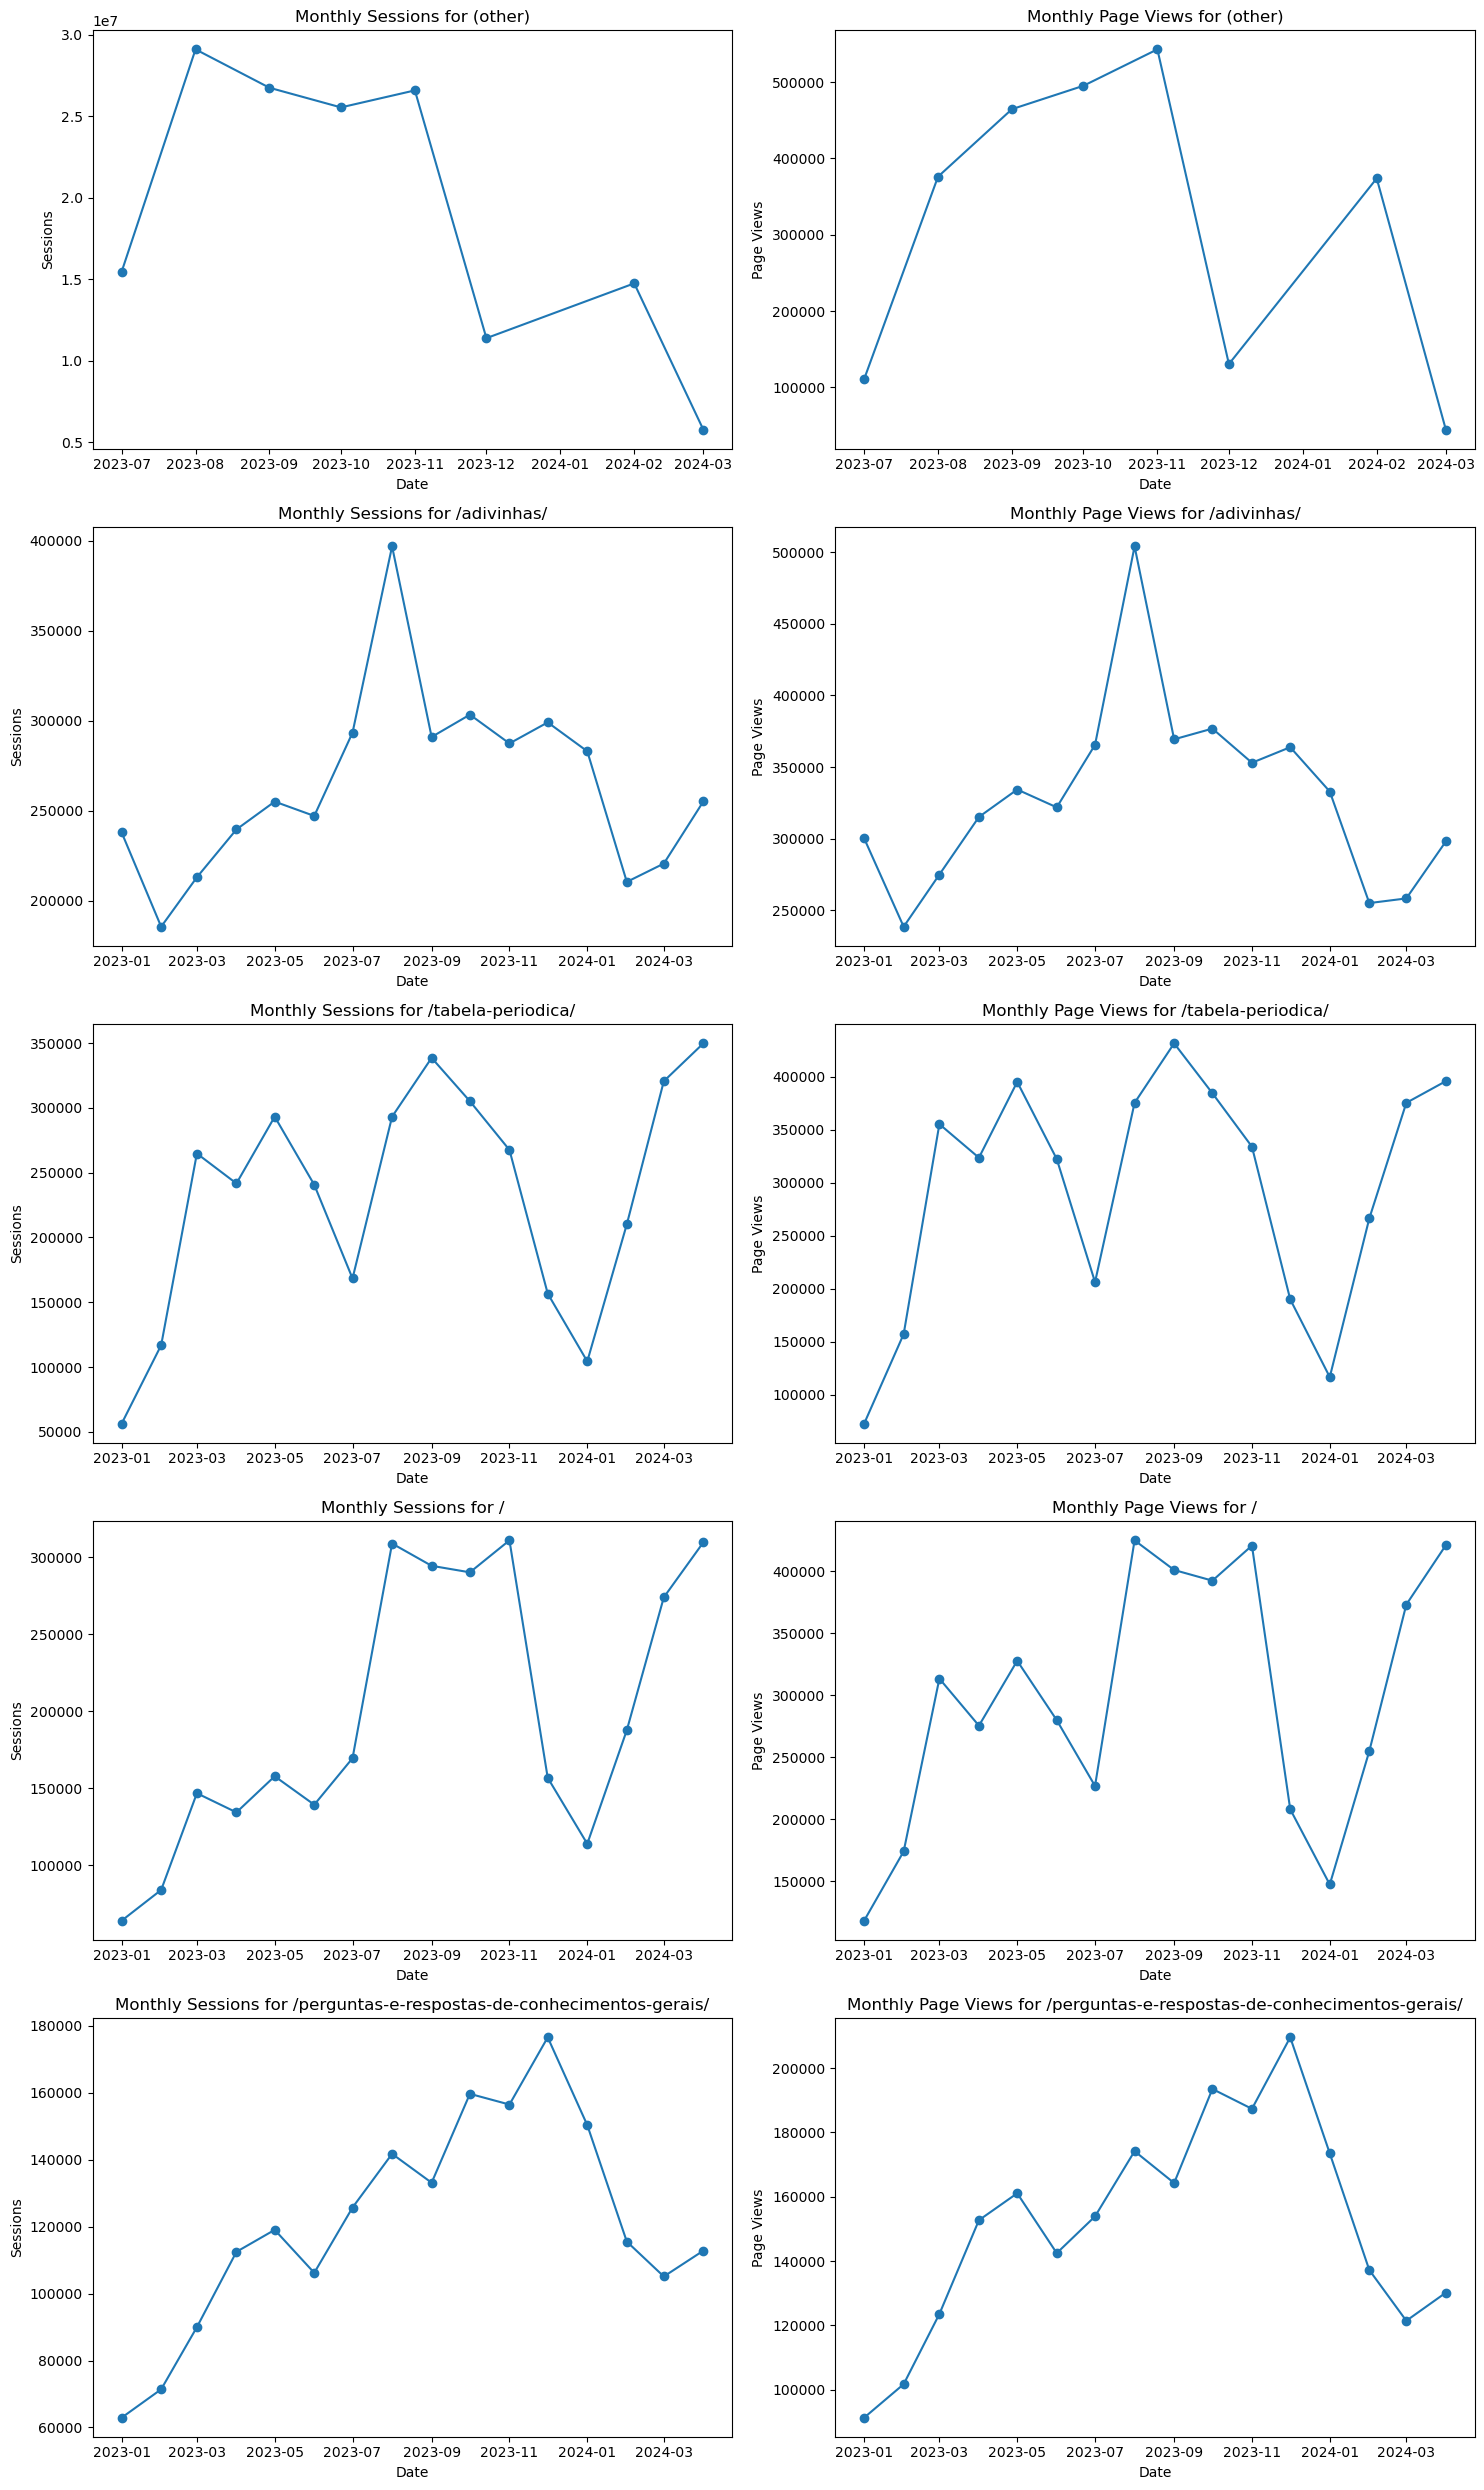

In [92]:


# Identify the most popular page paths based on the total number of sessions
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(5).index

# Filter data for the top page paths
top_paths_data = data[data['page_path'].isin(top_page_paths)]

# Aggregate the data by month and page path
top_monthly_data = top_paths_data.groupby([top_paths_data['date'].dt.to_period('M'), 'page_path']).sum(numeric_only=True)

# Reset the index to have the dates and page paths as columns again
top_monthly_data = top_monthly_data.reset_index()

# Convert the 'date' column back to datetime format
top_monthly_data['date'] = top_monthly_data['date'].dt.to_timestamp()

# Plotting the trends over time for each top page path
fig, axs = plt.subplots(len(top_page_paths), 2, figsize=(15, 5 * len(top_page_paths)))

for i, path in enumerate(top_page_paths):
    page_data = top_monthly_data[top_monthly_data['page_path'] == path]
    
    # Sessions over time
    axs[i, 0].plot(page_data['date'], page_data['sessions'], marker='o')
    axs[i, 0].set_title(f'Monthly Sessions for {path}')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Sessions')
    
    # Page Views over time
    axs[i, 1].plot(page_data['date'], page_data['page_views'], marker='o')
    axs[i, 1].set_title(f'Monthly Page Views for {path}')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Page Views')

# Adjust layout
plt.tight_layout()
plt.show()


## Compare metrics between top paths.

Summary of Key Metrics for Top Page Paths:
                                                  sessions  page_views  \
page_path                                                                
(other)                                          155385970     2539000   
/                                                  3141948     4758480   
/adivinhas/                                        4218858     5261695   
/perguntas-e-respostas-de-conhecimentos-gerais/    1939237     2417914   
/tabela-periodica/                                 3727541     4699065   

                                                 number_bounces  \
page_path                                                         
(other)                                                51537996   
/                                                       1312017   
/adivinhas/                                             2430504   
/perguntas-e-respostas-de-conhecimentos-gerais/          973285   
/tabela-periodica/                  

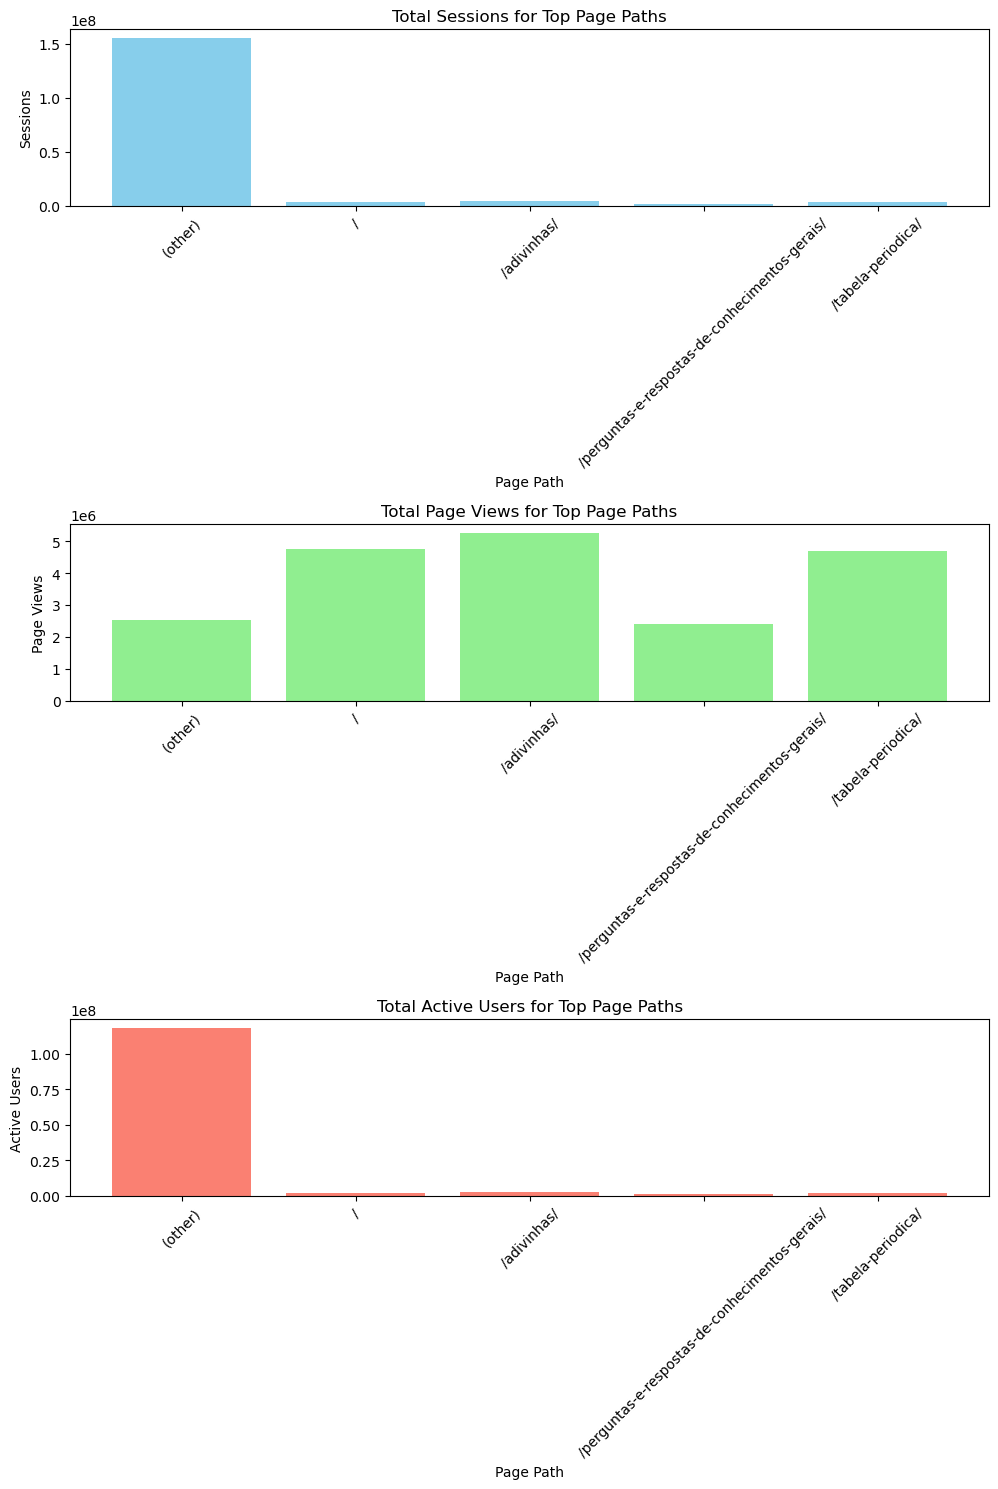

In [94]:


# Identify the most popular page paths based on the total number of sessions
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(5).index

# Filter data for the top page paths
top_paths_data = data[data['page_path'].isin(top_page_paths)]

# Aggregate the data by page path for the entire period to compare metrics between top paths
top_paths_summary = top_paths_data.groupby('page_path').sum(numeric_only=True)

# Display the summary to compare metrics
print("Summary of Key Metrics for Top Page Paths:")
print(top_paths_summary)

# Plot the comparison
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot total sessions for top page paths
axs[0].bar(top_paths_summary.index, top_paths_summary['sessions'], color='skyblue')
axs[0].set_title('Total Sessions for Top Page Paths')
axs[0].set_xlabel('Page Path')
axs[0].set_ylabel('Sessions')
axs[0].tick_params(axis='x', rotation=45)

# Plot total page views for top page paths
axs[1].bar(top_paths_summary.index, top_paths_summary['page_views'], color='lightgreen')
axs[1].set_title('Total Page Views for Top Page Paths')
axs[1].set_xlabel('Page Path')
axs[1].set_ylabel('Page Views')
axs[1].tick_params(axis='x', rotation=45)

# Plot total active users for top page paths
axs[2].bar(top_paths_summary.index, top_paths_summary['active_users'], color='salmon')
axs[2].set_title('Total Active Users for Top Page Paths')
axs[2].set_xlabel('Page Path')
axs[2].set_ylabel('Active Users')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



Insights:
Sessions and Page Views:

The path labeled "(other)" has an overwhelmingly higher number of sessions compared to the other top paths.
Among the more specific paths, "/adivinhas/" leads in sessions and page views.
Bounce Rates:

"/adivinhas/" also has a higher number of bounces, which may suggest a high initial interest but potentially lower content retention.
"/perguntas-e-respostas-de-conhecimentos-gerais/" has the lowest number of bounces among the top paths, indicating potentially better user engagement.
Engagement Time:

Engagement time is highest for "(other)", followed by "/adivinhas/".
The main "/" page has significantly lower engagement time compared to other paths, indicating brief visits.
Active Users:

"(other)" has the highest number of active users, significantly more than the specific paths.
"/adivinhas/" and "/tabela-periodica/" have higher active user counts compared to the other specific paths.

In [95]:
# Identify the most popular page paths based on the total number of sessions
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(6).index

# Filter data for the top page paths
top_paths_data = data[data['page_path'].isin(top_page_paths)]

# Drop the '(other)' page path
cleaned_top_paths_data = top_paths_data[top_paths_data['page_path'] != '(other)']

# Aggregate the data by page path for the entire period to compare metrics between top paths
cleaned_top_paths_summary = cleaned_top_paths_data.groupby('page_path').sum(numeric_only=True)

# Display the cleaned summary to compare metrics
print("Summary of Key Metrics for Top Page Paths (Excluding 'other'):")
print(cleaned_top_paths_summary)

Summary of Key Metrics for Top Page Paths (Excluding 'other'):
                                                 sessions  page_views  \
page_path                                                               
/                                                 3141948     4758480   
/adivinhas/                                       4218858     5261695   
/perguntas-e-respostas-de-conhecimentos-gerais/   1939237     2417914   
/tabela-periodica/                                3727541     4699065   
/trava-linguas/                                   1756826     2063984   

                                                 number_bounces  \
page_path                                                         
/                                                       1312017   
/adivinhas/                                             2430504   
/perguntas-e-respostas-de-conhecimentos-gerais/          973285   
/tabela-periodica/                                      2279807   
/trava-linguas/        

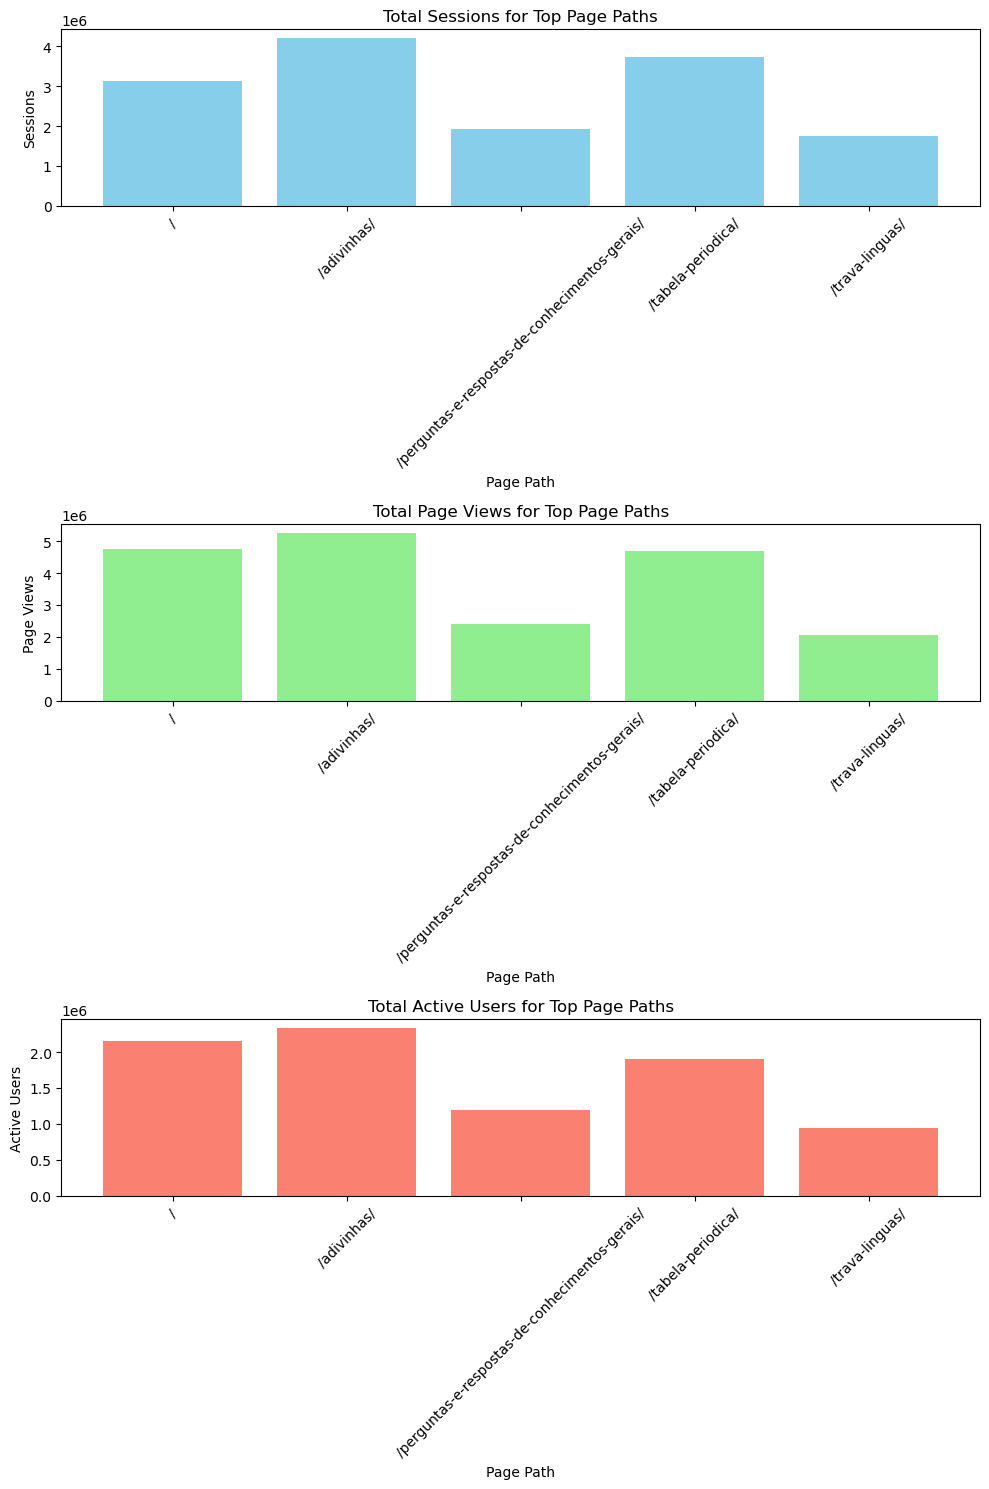

In [96]:
# Plot the comparison
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot total sessions for top page paths
axs[0].bar(cleaned_top_paths_summary.index, cleaned_top_paths_summary['sessions'], color='skyblue')
axs[0].set_title('Total Sessions for Top Page Paths')
axs[0].set_xlabel('Page Path')
axs[0].set_ylabel('Sessions')
axs[0].tick_params(axis='x', rotation=45)

# Plot total page views for top page paths
axs[1].bar(cleaned_top_paths_summary.index, cleaned_top_paths_summary['page_views'], color='lightgreen')
axs[1].set_title('Total Page Views for Top Page Paths')
axs[1].set_xlabel('Page Path')
axs[1].set_ylabel('Page Views')
axs[1].tick_params(axis='x', rotation=45)

# Plot total active users for top page paths
axs[2].bar(cleaned_top_paths_summary.index, cleaned_top_paths_summary['active_users'], color='salmon')
axs[2].set_title('Total Active Users for Top Page Paths')
axs[2].set_xlabel('Page Path')
axs[2].set_ylabel('Active Users')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [98]:
# Display basic information
data.info()

# Display summary statistics
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282274 entries, 0 to 282273
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   page_path       282274 non-null  object        
 1   sessions        282274 non-null  int64         
 2   page_views      282274 non-null  int64         
 3   number_bounces  282274 non-null  int64         
 4   engagment_time  154040 non-null  float64       
 5   active_users    154040 non-null  float64       
 6   date            282274 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 15.1+ MB


C:\Users\User\AppData\Local\Temp\ipykernel_15928\1152750239.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,page_path,sessions,page_views,number_bounces,engagment_time,active_users,date
count,282274,2.822740e+05,282274.000000,2.822740e+05,1.540400e+05,1.540400e+05,282274
unique,122107,NaN,NaN,NaN,NaN,NaN,16
top,/mercosul/,NaN,NaN,NaN,NaN,NaN,2024-04-01 00:00:00
freq,16,NaN,NaN,NaN,NaN,NaN,25570
first,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-01 00:00:00
mean,NaN,1.883862e+03,1783.921151,8.934645e+02,1.289692e+05,2.123538e+03,NaN
std,NaN,1.121663e+05,7808.681464,3.661651e+04,1.931723e+07,1.149101e+05,NaN
min,NaN,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,NaN
25%,NaN,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,NaN


## Bounce Rate Over Time for Most popular Pages

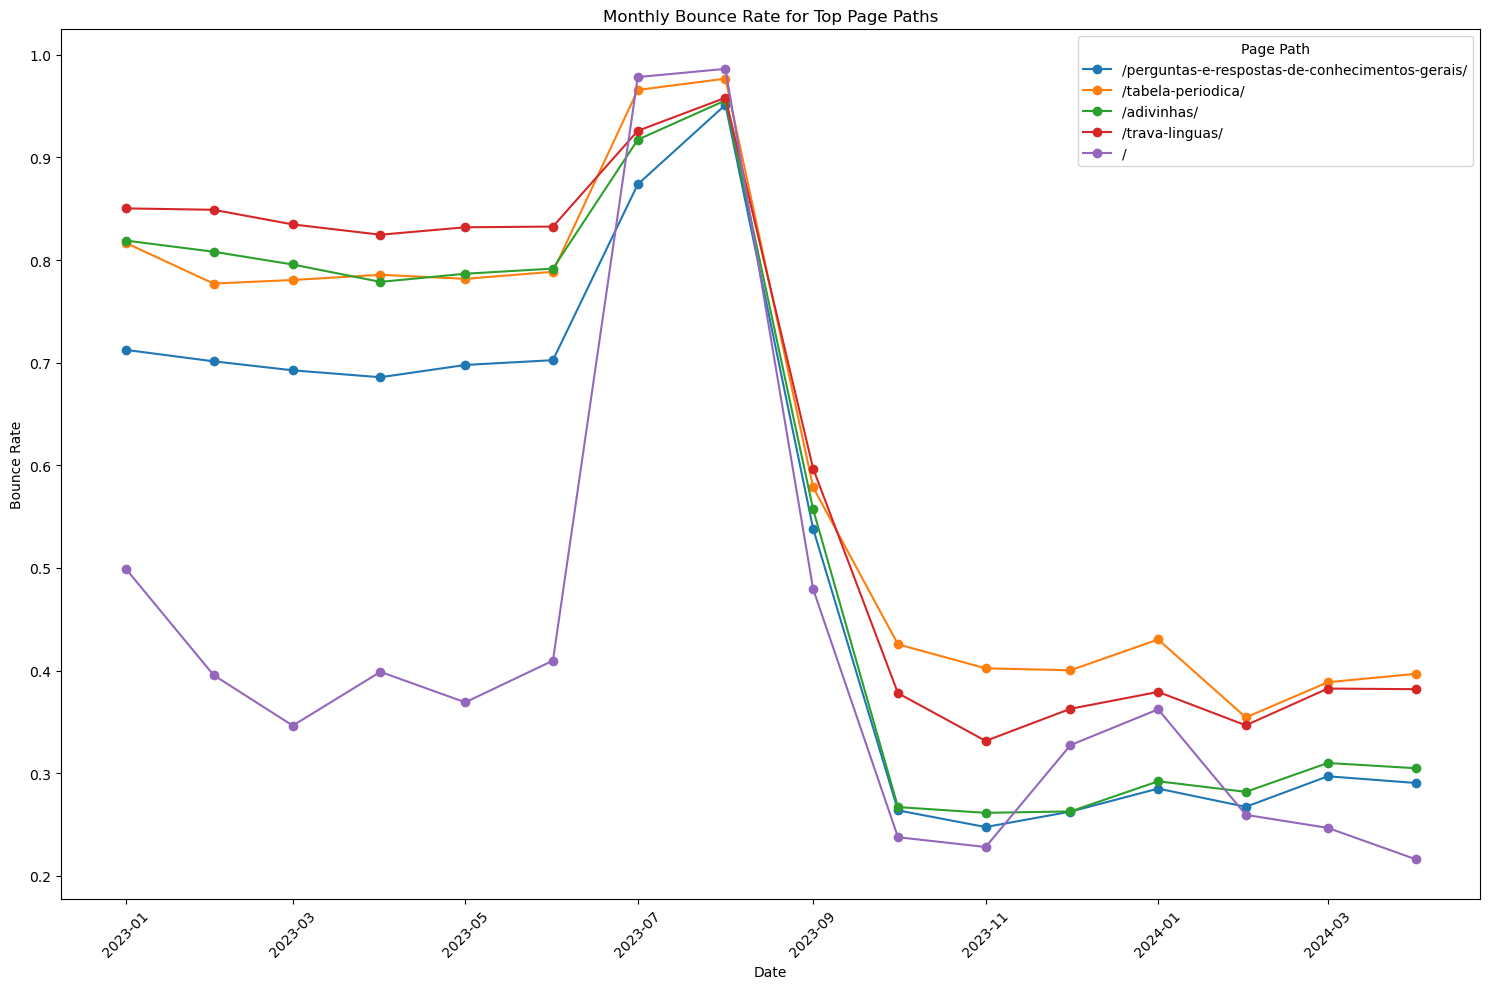

In [99]:

# Identify the most popular page paths based on the total number of sessions
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(6).index

# Filter data for the top page paths
top_paths_data = data[data['page_path'].isin(top_page_paths)]

# Drop the '(other)' page path
cleaned_top_paths_data = top_paths_data[top_paths_data['page_path'] != '(other)']

# Aggregate the data by month and page path
top_monthly_data = cleaned_top_paths_data.groupby([cleaned_top_paths_data['date'].dt.to_period('M'), 'page_path']).sum(numeric_only=True)

# Reset the index to have the dates and page paths as columns again
top_monthly_data = top_monthly_data.reset_index()

# Convert the 'date' column back to datetime format
top_monthly_data['date'] = top_monthly_data['date'].dt.to_timestamp()

# Calculate bounce rate: number_bounces / sessions
top_monthly_data['bounce_rate'] = top_monthly_data['number_bounces'] / top_monthly_data['sessions']

# Plotting the bounce rate over time for each top page path
fig, ax = plt.subplots(figsize=(15, 10))

for path in cleaned_top_paths_data['page_path'].unique():
    page_data = top_monthly_data[top_monthly_data['page_path'] == path]
    ax.plot(page_data['date'], page_data['bounce_rate'], marker='o', label=path)

ax.set_title('Monthly Bounce Rate for Top Page Paths')
ax.set_xlabel('Date')
ax.set_ylabel('Bounce Rate')
ax.legend(title='Page Path')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## engagement time for top paths

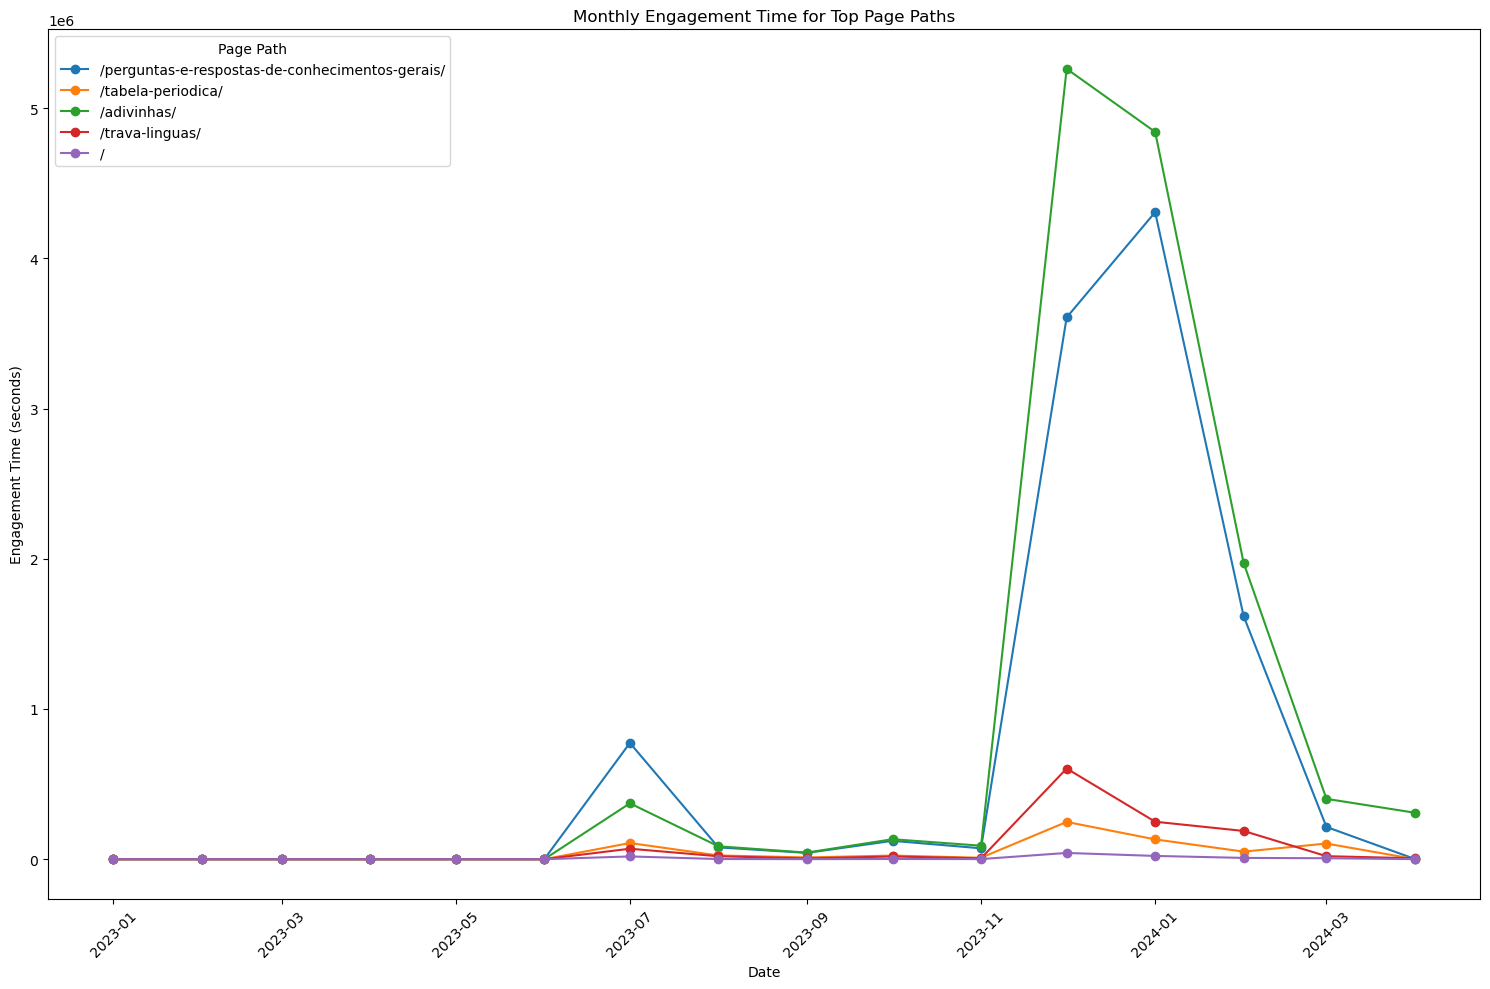

In [100]:


# Identify the most popular page paths based on the total number of sessions
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(6).index

# Filter data for the top page paths
top_paths_data = data[data['page_path'].isin(top_page_paths)]

# Drop the '(other)' page path
cleaned_top_paths_data = top_paths_data[top_paths_data['page_path'] != '(other)']

# Aggregate the data by month and page path, focusing on engagement time
engagement_data = cleaned_top_paths_data.groupby([cleaned_top_paths_data['date'].dt.to_period('M'), 'page_path']).sum(numeric_only=True)

# Reset the index to have the dates and page paths as columns again
engagement_data = engagement_data.reset_index()

# Convert the 'date' column back to datetime format
engagement_data['date'] = engagement_data['date'].dt.to_timestamp()

# Plotting the engagement time over time for each top page path
fig, ax = plt.subplots(figsize=(15, 10))

for path in cleaned_top_paths_data['page_path'].unique():
    page_data = engagement_data[engagement_data['page_path'] == path]
    ax.plot(page_data['date'], page_data['engagment_time'], marker='o', label=path)

ax.set_title('Monthly Engagement Time for Top Page Paths')
ax.set_xlabel('Date')
ax.set_ylabel('Engagement Time (seconds)')
ax.legend(title='Page Path')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Show average engagement per page path

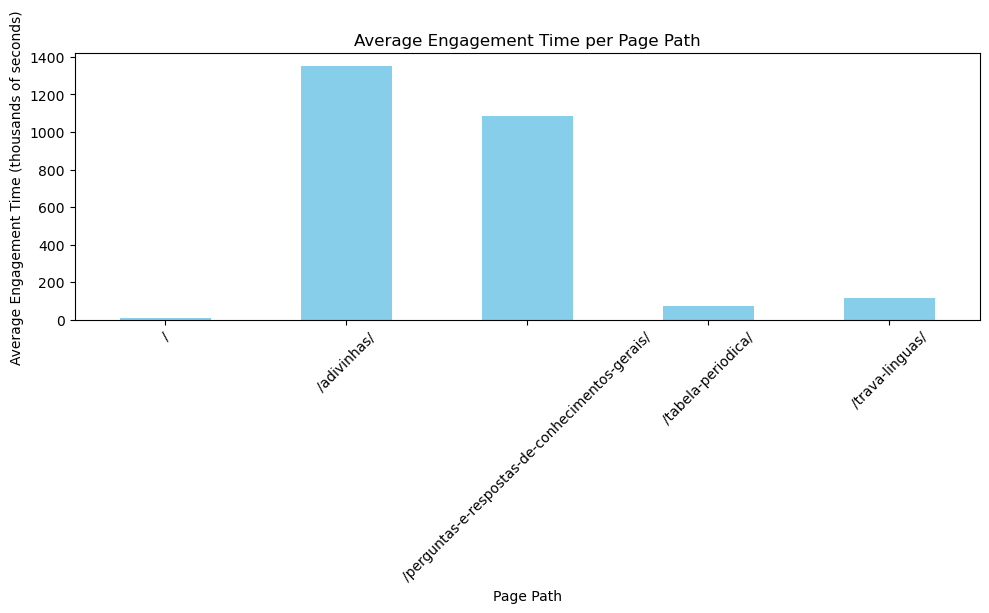

In [102]:


# Identify the most popular page paths based on the total number of sessions
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(6).index

# Filter data for the top page paths
top_paths_data = data[data['page_path'].isin(top_page_paths)]

# Drop the '(other)' page path
cleaned_top_paths_data = top_paths_data[top_paths_data['page_path'] != '(other)']

# Calculate the average engagement time per page path
average_engagement_per_path = cleaned_top_paths_data.groupby('page_path')['engagment_time'].mean()

# Convert the average engagement time to thousands of seconds for readability
average_engagement_per_path = average_engagement_per_path / 1000

# Plotting the average engagement time for each top page path in thousands of seconds
fig, ax = plt.subplots(figsize=(10, 6))

average_engagement_per_path.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Average Engagement Time per Page Path')
ax.set_xlabel('Page Path')
ax.set_ylabel('Average Engagement Time (thousands of seconds)')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



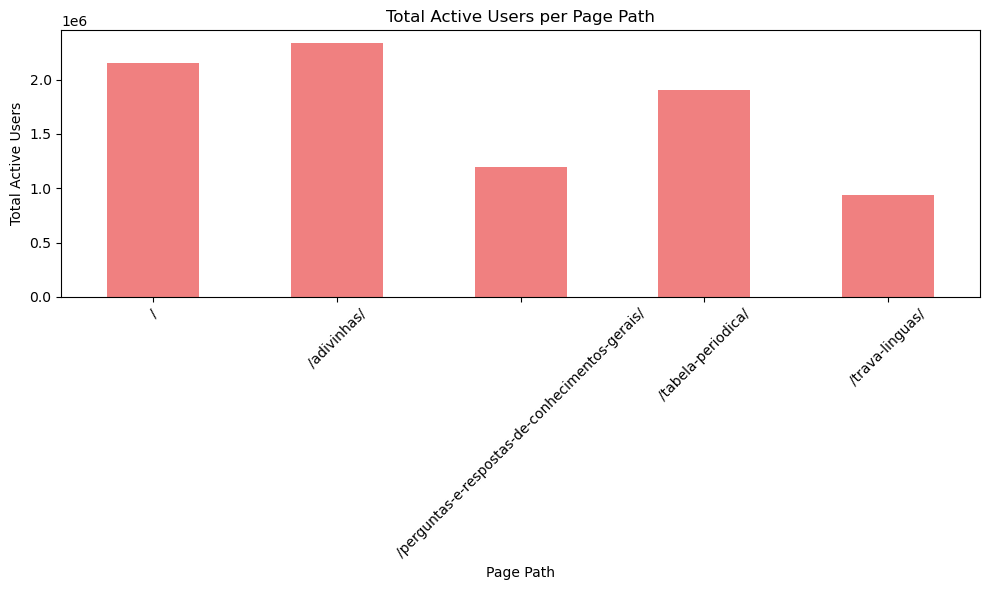

In [103]:


# Identify the most popular page paths based on the total number of sessions
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(6).index

# Filter data for the top page paths
top_paths_data = data[data['page_path'].isin(top_page_paths)]

# Drop the '(other)' page path
cleaned_top_paths_data = top_paths_data[top_paths_data['page_path'] != '(other)']

# Calculate the total active users per page path
active_users_per_path = cleaned_top_paths_data.groupby('page_path')['active_users'].sum()

# Plotting the total active users for each top page path
fig, ax = plt.subplots(figsize=(10, 6))

active_users_per_path.plot(kind='bar', color='lightcoral', ax=ax)
ax.set_title('Total Active Users per Page Path')
ax.set_xlabel('Page Path')
ax.set_ylabel('Total Active Users')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Predictive Modeling - Decision Trees (because there are many NAN)

C:\Users\User\AppData\Local\Temp\ipykernel_15928\914895704.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_top_paths_data['cluster'] = kmeans.fit_predict(X_scaled)
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.57      1.00      0.73         4
           2       0.00      0.00      0.00         2

    accuracy                           0.81        16
   macro avg       0.52      0.63      0.56        16
weighted avg       0.77      0.81      0.77        16



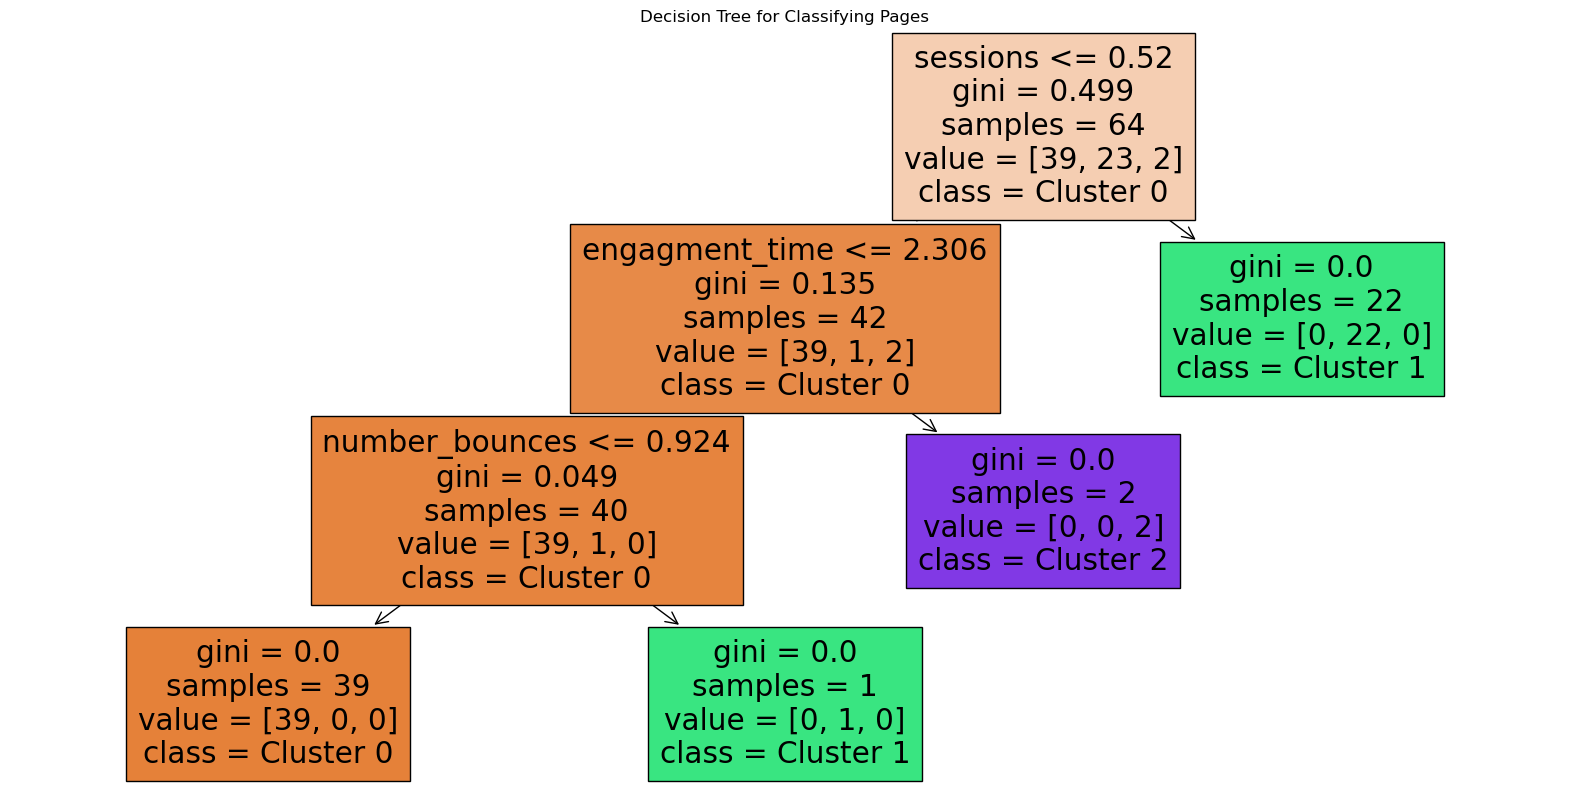

,page_path,cluster
1216,/perguntas-e-respostas-de-conhecimentos-gerais/,0
11823,/tabela-periodica/,1
12049,/perguntas-e-respostas-de-conhecimentos-gerais/,0
17542,/adivinhas/,1
29537,/trava-linguas/,0
...,...,...
261537,/adivinhas/,1
267884,/tabela-periodica/,0
272055,/,1
272318,/perguntas-e-respostas-de-conhecimentos-gerais/,0


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Convert the 'date' column to datetime format for easier manipulation
data['date'] = pd.to_datetime(data['date'])

# Filter out the '(other)' page path
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(6).index
top_paths_data = data[data['page_path'].isin(top_page_paths)]
cleaned_top_paths_data = top_paths_data[top_paths_data['page_path'] != '(other)']

# Select relevant features for classification
features = ['sessions', 'page_views', 'number_bounces', 'engagment_time', 'active_users']
X = cleaned_top_paths_data[features]

# Handle missing values by filling with the mean of the column
X = X.fillna(X.mean())

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create target labels (for simplicity, using k-means clusters as labels)
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_top_paths_data['cluster'] = kmeans.fit_predict(X_scaled)
y = cleaned_top_paths_data['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=[f'Cluster {i}' for i in range(3)], filled=True)
plt.title('Decision Tree for Classifying Pages')
plt.show()

# Show the cluster assignments
cleaned_top_paths_data[['page_path', 'cluster']]



In [107]:



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train a random forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Cross-validation scores
cv_scores = cross_val_score(rf_clf, X_scaled, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')


Random Forest Accuracy: 0.875
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      1.00      0.80         4
           2       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.56      0.67      0.60        16
weighted avg       0.79      0.88      0.82        16



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_se

Cross-Validation Scores: [1.     0.9375 0.9375 0.9375 0.875 ]
Average Cross-Validation Score: 0.9375


# Predictive Modeling - Clustering with K-means

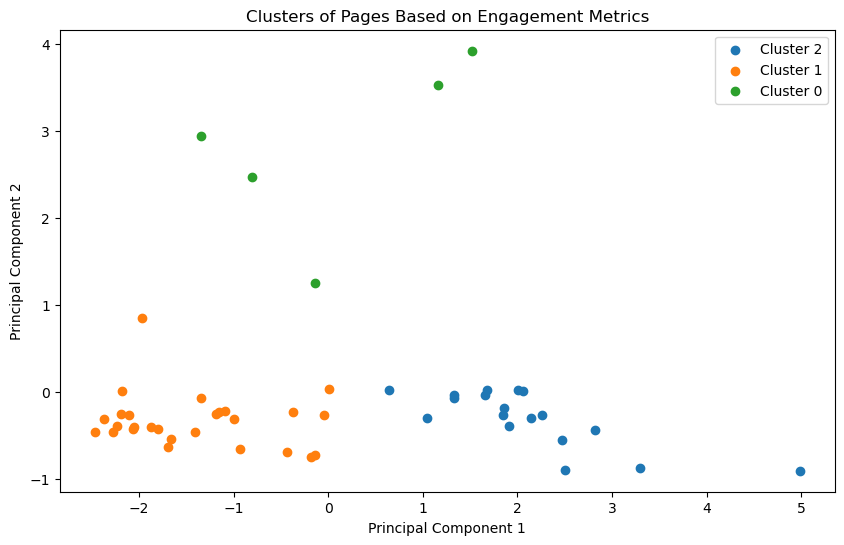

                                              page_path  cluster
11823                                /tabela-periodica/        2
12049   /perguntas-e-respostas-de-conhecimentos-gerais/        1
17542                                       /adivinhas/        2
35361                                /tabela-periodica/        1
44789                                /tabela-periodica/        2
50085                                                 /        1
50683                                   /trava-linguas/        1
55625                                /tabela-periodica/        2
55684   /perguntas-e-respostas-de-conhecimentos-gerais/        1
67155   /perguntas-e-respostas-de-conhecimentos-gerais/        1
68442                                                 /        1
72758                                                 /        2
83276   /perguntas-e-respostas-de-conhecimentos-gerais/        0
83540                                       /adivinhas/        2
83785                    

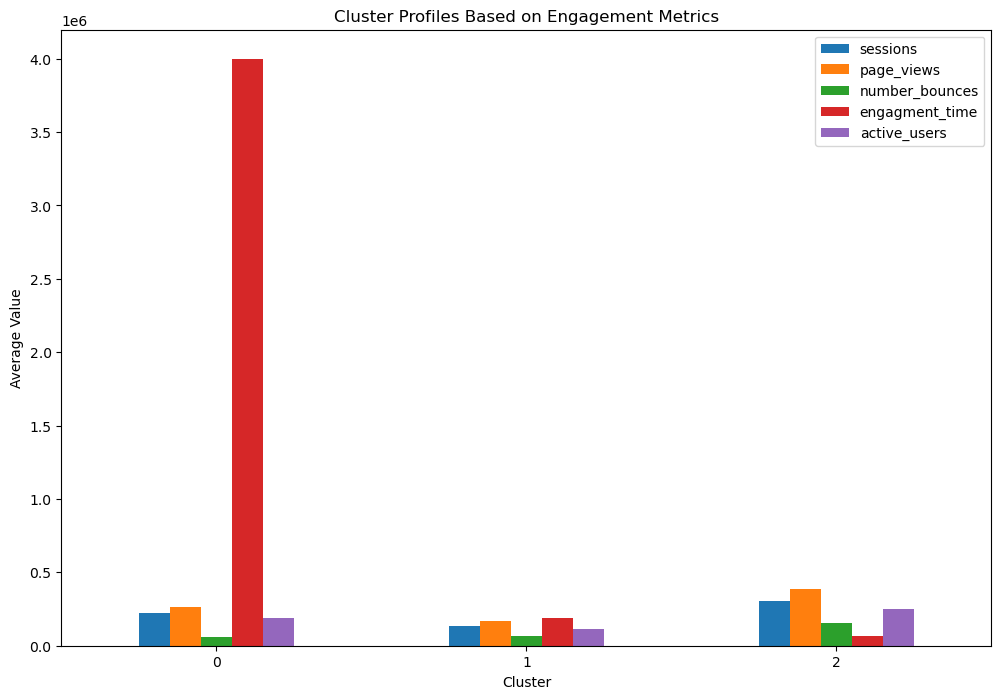

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Filter out the '(other)' page path
top_page_paths = data.groupby('page_path').sum(numeric_only=True).sort_values(by='sessions', ascending=False).head(6).index
top_paths_data = data[data['page_path'].isin(top_page_paths)]
cleaned_top_paths_data = top_paths_data[top_paths_data['page_path'] != '(other)']

# Select relevant features for clustering
features = ['sessions', 'page_views', 'number_bounces', 'engagment_time', 'active_users']
X = cleaned_top_paths_data[features]

# Drop rows with NaN values
X = X.dropna()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_top_paths_data = cleaned_top_paths_data.loc[X.index]  # Ensure the indices match
cleaned_top_paths_data['cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
cleaned_top_paths_data['pc1'] = principal_components[:, 0]
cleaned_top_paths_data['pc2'] = principal_components[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in cleaned_top_paths_data['cluster'].unique():
    cluster_data = cleaned_top_paths_data[cleaned_top_paths_data['cluster'] == cluster]
    plt.scatter(cluster_data['pc1'], cluster_data['pc2'], label=f'Cluster {cluster}')

plt.title('Clusters of Pages Based on Engagement Metrics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Show the cluster assignments
print(cleaned_top_paths_data[['page_path', 'cluster']])

# Detailed examination of clusters
cluster_profiles = cleaned_top_paths_data.groupby('cluster')[features].mean()
print("Cluster Profiles:\n", cluster_profiles)

# Visualizing cluster profiles
cluster_profiles.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Profiles Based on Engagement Metrics')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


Detailed Cluster Profiles:
               sessions                             page_views            \
                  mean    median           std           mean    median   
cluster                                                                   
0        223904.600000  210481.0  65156.199715  266951.000000  255032.0   
1        136932.777778  124584.0  35086.578052  165121.888889  147306.0   
2        305012.777778  298915.0  32407.093162  388619.111111  380524.0   

                      number_bounces                         engagment_time  \
                  std           mean    median           std           mean   
cluster                                                                       
0        80480.837443   61951.400000   59312.0  18173.722467   3.997798e+06   
1        49037.784086   67879.888889   47085.0  43786.409296   1.903760e+05   
2        43983.387404  152644.444444  127202.5  95958.403094   6.781761e+04   

                                 active_users 

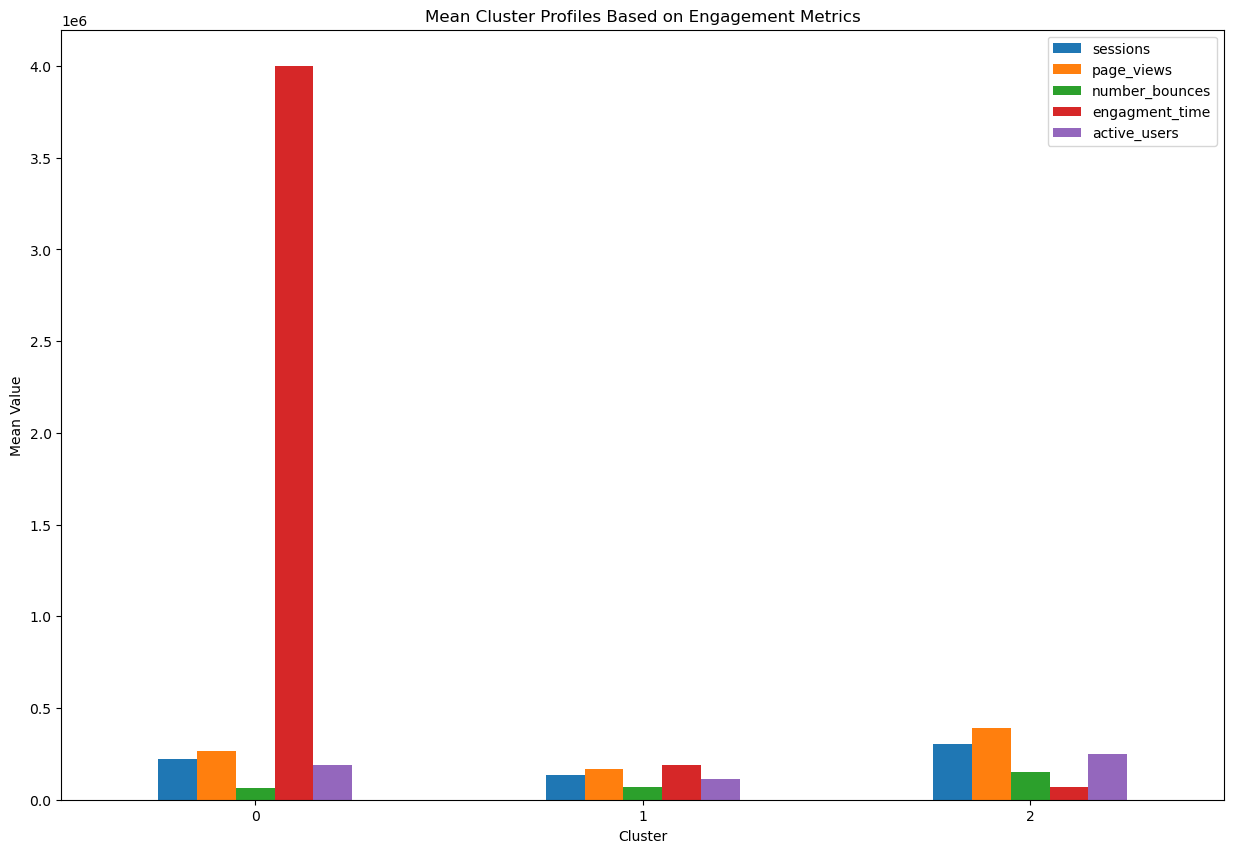

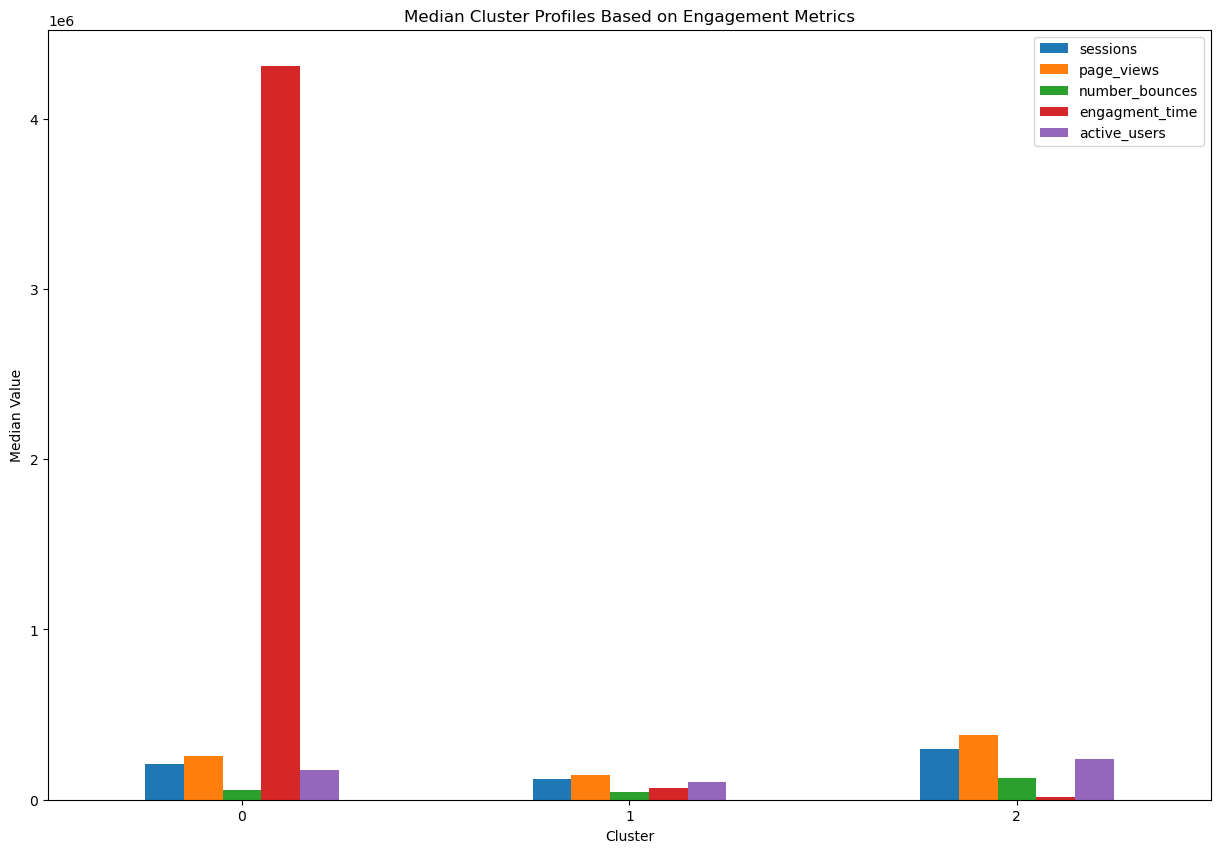

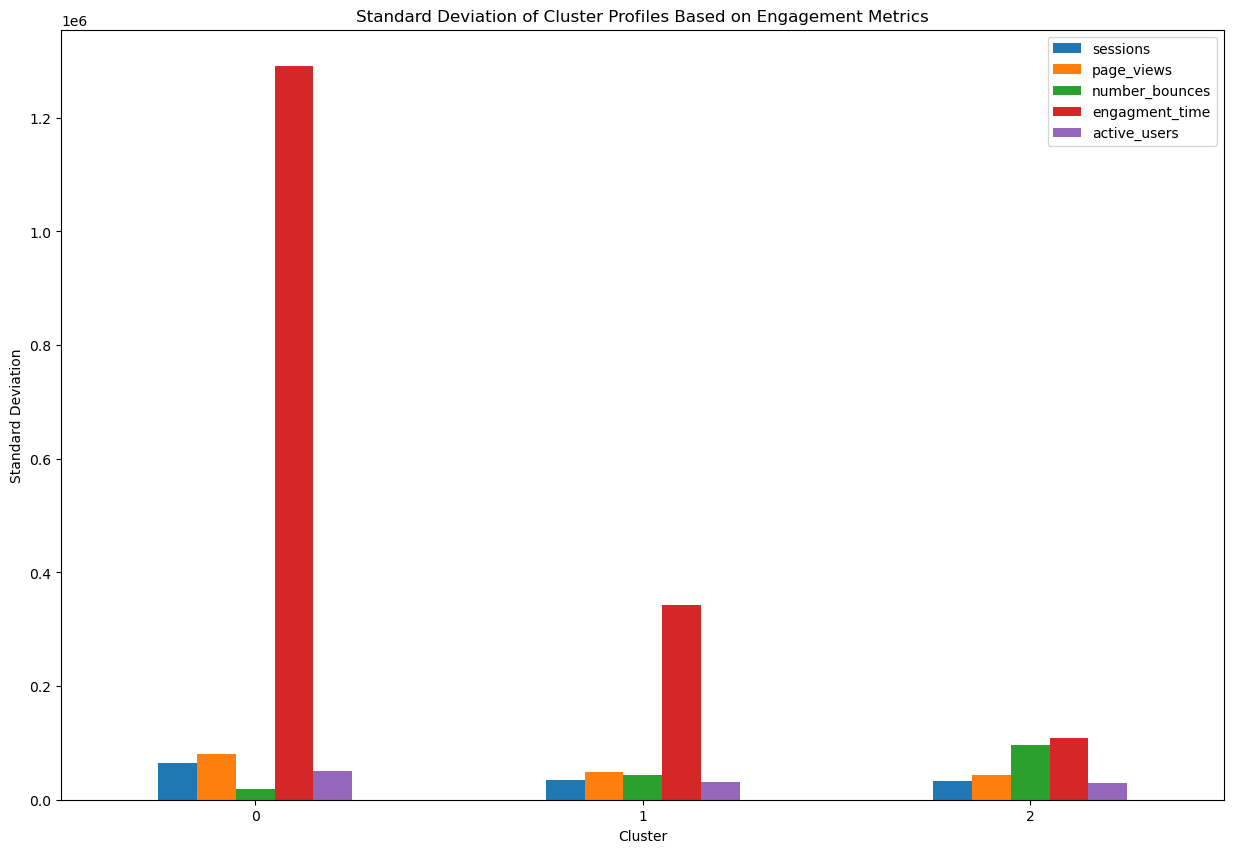

In [111]:
# Further profiling of top clusters by calculating additional statistics
cluster_profiles = cleaned_top_paths_data.groupby('cluster')[features].agg(['mean', 'median', 'std'])
print("Detailed Cluster Profiles:\n", cluster_profiles)

# Visualizing cluster profiles for mean values
cluster_profiles_mean = cluster_profiles.xs('mean', level=1, axis=1)
cluster_profiles_mean.plot(kind='bar', figsize=(15, 10))
plt.title('Mean Cluster Profiles Based on Engagement Metrics')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Visualizing cluster profiles for median values
cluster_profiles_median = cluster_profiles.xs('median', level=1, axis=1)
cluster_profiles_median.plot(kind='bar', figsize=(15, 10))
plt.title('Median Cluster Profiles Based on Engagement Metrics')
plt.xlabel('Cluster')
plt.ylabel('Median Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Visualizing cluster profiles for standard deviation values
cluster_profiles_std = cluster_profiles.xs('std', level=1, axis=1)
cluster_profiles_std.plot(kind='bar', figsize=(15, 10))
plt.title('Standard Deviation of Cluster Profiles Based on Engagement Metrics')
plt.xlabel('Cluster')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


Detailed Cluster Profiles:
Here are the detailed profiles of each cluster, including mean, median, and standard deviation values for the engagement metrics:

Cluster 0:

Mean Values:
Sessions: 223,905
Page Views: 266,951
Number of Bounces: 61,951
Engagement Time: 3,997,798 seconds
Active Users: 186,599
Median Values:
Sessions: 210,481
Page Views: 255,032
Number of Bounces: 59,312
Engagement Time: 4,307,187 seconds
Active Users: 176,323
Standard Deviation:
Sessions: 65,156
Page Views: 80,481
Number of Bounces: 18,174
Engagement Time: 1,290,442
Active Users: 49,924
Cluster 1:

Mean Values:
Sessions: 136,933
Page Views: 165,122
Number of Bounces: 67,880
Engagement Time: 190,376 seconds
Active Users: 114,228
Median Values:
Sessions: 124,584
Page Views: 147,306
Number of Bounces: 47,085
Engagement Time: 69,757
Active Users: 101,662
Standard Deviation:
Sessions: 35,087
Page Views: 49,038
Number of Bounces: 43,786
Engagement Time: 341,809
Active Users: 30,770
Cluster 2:

Mean Values:
Sessions: 305,013
Page Views: 388,619
Number of Bounces: 152,644
Engagement Time: 67,818 seconds
Active Users: 250,197
Median Values:
Sessions: 298,915
Page Views: 380,524
Number of Bounces: 127,203
Engagement Time: 18,056
Active Users: 241,551
Standard Deviation:
Sessions: 32,407
Page Views: 43,983
Number of Bounces: 95,958
Engagement Time: 108,146
Active Users: 29,437
Analysis:
Cluster 0 has the highest engagement time and a significant number of sessions and page views, suggesting high user activity.
Cluster 1 shows moderate values for all metrics, indicating average user engagement.
Cluster 2 has the highest sessions and page views but a lower engagement time compared to Cluster 0, suggesting users might be visiting frequently but not staying lon

### Recommendations for Each Cluster

Based on the detailed profiles of each cluster, here are tailored suggestions and recommendations to optimize user engagement and improve metrics:

### Cluster 0: High Engagement, Significant User Activity

#### Characteristics:
- High engagement time
- Significant number of sessions and page views
- High number of active users

#### Recommendations:
1. **Enhance Content**:
   - **Deep Content**: Since users are highly engaged, continue to provide in-depth articles, videos, and interactive content.
   - **Regular Updates**: Regularly update content to keep users returning and maintain engagement.

2. **Promote User Interaction**:
   - **Community Features**: Introduce or enhance forums, comment sections, and user-generated content to leverage high user activity.
   - **Surveys and Feedback**: Collect feedback to understand user preferences and further tailor content.

3. **Monetization**:
   - **Premium Content**: Consider introducing premium content or subscriptions for highly engaged users.
   - **Advertisements**: Use targeted advertisements carefully to avoid disrupting the high engagement levels.

### Cluster 1: Moderate User Engagement

#### Characteristics:
- Moderate values for sessions, page views, number of bounces, and engagement time
- Average number of active users

#### Recommendations:
1. **Content Improvement**:
   - **Improve Quality**: Focus on improving the quality and relevance of content to increase user engagement.
   - **Content Variety**: Introduce a variety of content types (e.g., videos, infographics) to cater to different user preferences.

2. **Reduce Bounce Rate**:
   - **Better Navigation**: Improve site navigation to help users find content more easily.
   - **Engaging Intros**: Use engaging introductions and summaries to capture user interest early.

3. **User Engagement Strategies**:
   - **Email Newsletters**: Send personalized email newsletters to bring users back to the site.
   - **Push Notifications**: Use push notifications to alert users about new content and updates.

### Cluster 2: High Sessions and Page Views, Lower Engagement Time

#### Characteristics:
- Highest number of sessions and page views
- Lower engagement time compared to Cluster 0
- High number of active users

#### Recommendations:
1. **Increase Engagement Time**:
   - **Engaging Content**: Focus on creating more engaging content to retain users for longer durations.
   - **Content Linking**: Use internal linking strategies to guide users to other relevant content.

2. **User Retention**:
   - **User Journey**: Optimize the user journey to ensure users spend more time on the site.
   - **Interactive Elements**: Introduce interactive elements like quizzes, polls, and contests to increase engagement time.

3. **Analyzing Drop-off Points**:
   - **Heatmaps and Analytics**: Use heatmaps and analytics to understand where users are dropping off and why.
   - **A/B Testing**: Conduct A/B testing on different page layouts and content strategies to find the most effective methods for increasing engagement.

### General Recommendations:

1. **Data-Driven Decisions**:
   - Continuously monitor key metrics and user behavior to make data-driven decisions for content and feature improvements.

2. **Personalization**:
   - Personalize user experiences based on their engagement patterns and preferences.

3. **User Feedback**:
   - Actively seek user feedback and use it to inform site and content improvements.

4. **SEO Optimization**:
   - Ensure that the site is well-optimized for search engines to attract more users and improve overall metrics.

By implementing these tailored recommendations, you can optimize the user experience for each cluster, enhance engagement metrics, and drive overall growth.